### INFLACIÓN (ACT EN CLASE)

In [105]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

# Cargar el dataset de inflación
inflation_df = pd.read_excel('inflacion.xlsx')
inflation_df.index = pd.to_datetime(inflation_df['Fecha'])

# Verifica las primeras filas para asegurarte de que los datos estén cargados correctamente
inflation_df


,Fecha,values
Fecha,,
1970-01-01,1970-01-01,5.20
1970-02-01,1970-02-01,4.81
1970-03-01,1970-03-01,5.01
1970-04-01,1970-04-01,4.87
1970-05-01,1970-05-01,5.09
...,...,...
2024-03-01,2024-03-01,4.42
2024-04-01,2024-04-01,4.65
2024-05-01,2024-05-01,4.69


In [106]:
inflation_df.dtypes

Fecha     datetime64[ns]
values           float64
dtype: object

In [107]:
inflation_df.index

DatetimeIndex(['1970-01-01', '1970-02-01', '1970-03-01', '1970-04-01',
               '1970-05-01', '1970-06-01', '1970-07-01', '1970-08-01',
               '1970-09-01', '1970-10-01',
               ...
               '2023-10-01', '2023-11-01', '2023-12-01', '2024-01-01',
               '2024-02-01', '2024-03-01', '2024-04-01', '2024-05-01',
               '2024-06-01', '2024-07-01'],
              dtype='datetime64[ns]', name='Fecha', length=655, freq=None)

In [108]:
pip install statsforecast

Note: you may need to restart the kernel to use updated packages.


In [109]:
del inflation_df['Fecha']

In [110]:

# HistoricAverage's usage example:
from statsforecast.models import HistoricAverage

# Create an array with the observed values in Bricks:
y_mean = inflation_df.values

# Define the model, fit and predict:
model = HistoricAverage()
model = model.fit(y=y_mean)
y_hat_dict = model.predict(h=3)

y_hat_dict

{'mean': array([21.39855, 21.39855, 21.39855], dtype=float32)}

In [111]:
pd.to_datetime(['2024-01-01', '2024-02-01', '2024-03-01'])

DatetimeIndex(['2024-01-01', '2024-02-01', '2024-03-01'], dtype='datetime64[ns]', freq=None)

In [112]:

# Specify the quarters predicted:
months_pred = pd.to_datetime(['2024-08-01', '2024-09-01', '2024-10-01'])

# Create a dataframe with the quarters and values predicted:
Y_pred_df = pd.DataFrame({'mean_forecast':y_hat_dict["mean"]}, index = months_pred)

In [113]:
Y_pred_df


,mean_forecast
2024-08-01,21.39855
2024-09-01,21.39855
2024-10-01,21.39855


In [114]:
pd.concat([inflation_df, Y_pred_df])


,values,mean_forecast
1970-01-01,5.20,NaN
1970-02-01,4.81,NaN
1970-03-01,5.01,NaN
1970-04-01,4.87,NaN
1970-05-01,5.09,NaN
...,...,...
2024-06-01,4.98,NaN
2024-07-01,5.57,NaN
2024-08-01,NaN,21.39855
2024-09-01,NaN,21.39855


In [115]:

frame = pd.concat([inflation_df, Y_pred_df])
frame.columns = ['Values', 'mean_forecast']

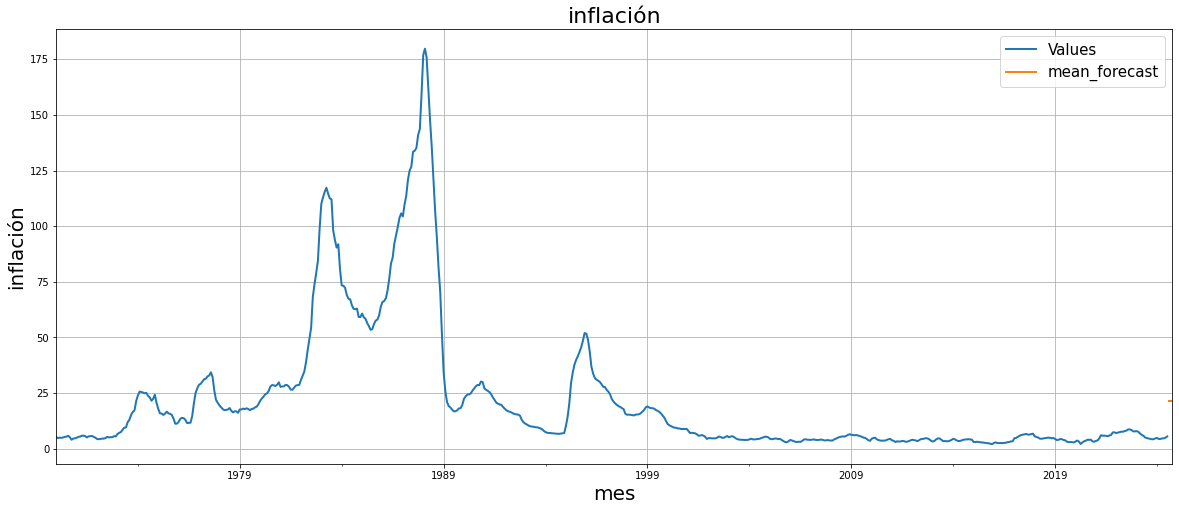

In [116]:

fig, ax = plt.subplots(1, 1, figsize = (20, 8))

# Concatenate the dataframe of predicted values with the dataframe of observed values:
plot_df = pd.concat([inflation_df, Y_pred_df])
plot_df.columns = ['Values', 'mean_forecast']
plot_df[['Values', 'mean_forecast']].plot(ax=ax, linewidth=2)

# Specify graph features:
ax.set_title('inflación', fontsize=22)
ax.set_ylabel('inflación', fontsize=20)
ax.set_xlabel('mes', fontsize=20)
ax.legend(prop={'size': 15})
ax.grid()
     

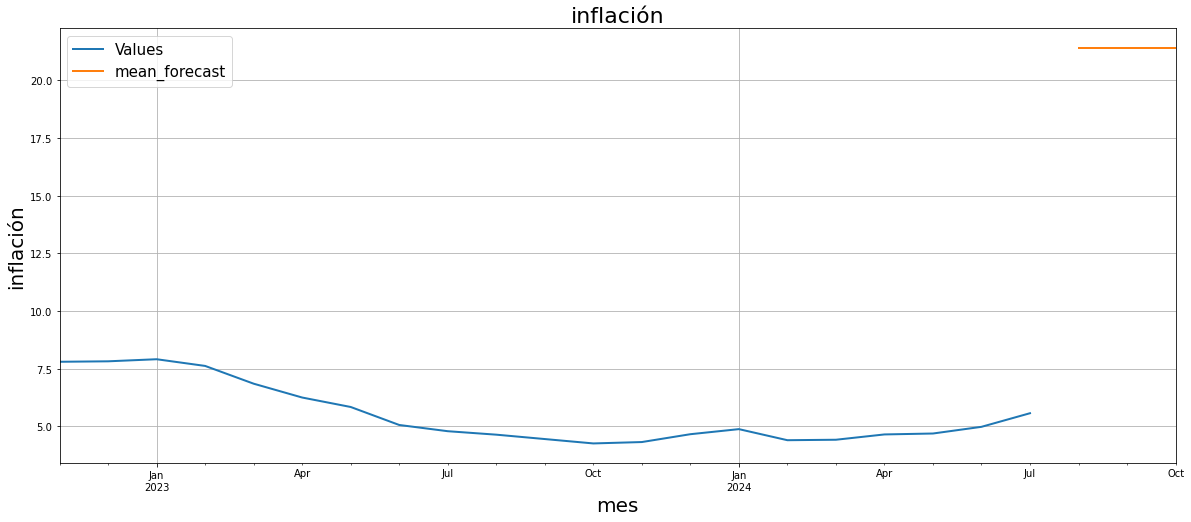

In [117]:

fig, ax = plt.subplots(1, 1, figsize = (20, 8))

# Concatenate the dataframe of predicted values with the dataframe of observed values:
plot_df = pd.concat([inflation_df, Y_pred_df])
plot_df.columns = ['Values', 'mean_forecast']
plot_df[-24:].plot(ax=ax, linewidth=2)

# Specify graph features:
ax.set_title('inflación', fontsize=22)
ax.set_ylabel('inflación', fontsize=20)
ax.set_xlabel('mes', fontsize=20)
ax.legend(prop={'size': 15})
ax.grid()

# Comentarios
### No es un modelo adecuado para la proyección


# Naive Model

In [118]:
inflation_df.values.reshape(-1,).shape

(655,)

In [120]:
# Naive's usage example:
from statsforecast.models import Naive

# Define the model, fit and predict:
model = Naive()
model = model.fit(y=inflation_df.values.reshape(-1,))
y_hat_dict = model.predict(h=3)
y_hat_dict

{'mean': array([5.57, 5.57, 5.57], dtype=float32)}

In [121]:
# Create a column with the values predicted:
Y_pred_df["naive_forecast"] = y_hat_dict["mean"]


In [122]:
Y_pred_df


,mean_forecast,naive_forecast
2024-08-01,21.39855,5.57
2024-09-01,21.39855,5.57
2024-10-01,21.39855,5.57


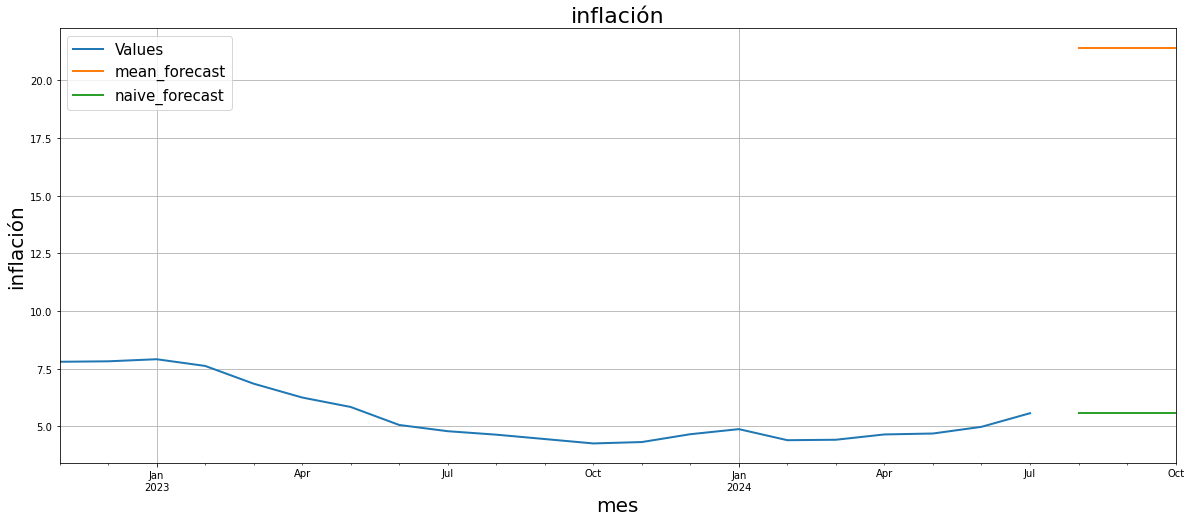

In [123]:
fig, ax = plt.subplots(1, 1, figsize = (20, 8))

# Concatenate the dataframe of predicted values with the dataframe of observed values:
plot_df = pd.concat([inflation_df, Y_pred_df])
plot_df.columns = ['Values', 'mean_forecast', 'naive_forecast']
plot_df[-24:].plot(ax=ax, linewidth=2)

# Specify graph features:
ax.set_title('inflación', fontsize=22)
ax.set_ylabel('inflación', fontsize=20)
ax.set_xlabel('mes', fontsize=20)
ax.legend(prop={'size': 15})
ax.grid()

# Comentarios
### Aqui podemos apreciar que la nueva predicción hecha con el NAIVE Model es mucho más certera que la hecha previamente, pues sigue la tendencia de la base de datos.

# Seasonal Naive

In [54]:

# SeasonalNaive's usage example:
from statsforecast.models import SeasonalNaive

# Define the model, fit and predict:
model = SeasonalNaive(season_length=12)
model = model.fit(y=inflation_df.values.reshape(-1,))
y_hat_dict = model.predict(h=3)

y_hat_dict

{'mean': array([4.64, 4.45, 4.26], dtype=float32)}

In [55]:

# Create a column with the values predicted:
Y_pred_df["seasonal_naive_forecast"] = y_hat_dict["mean"]

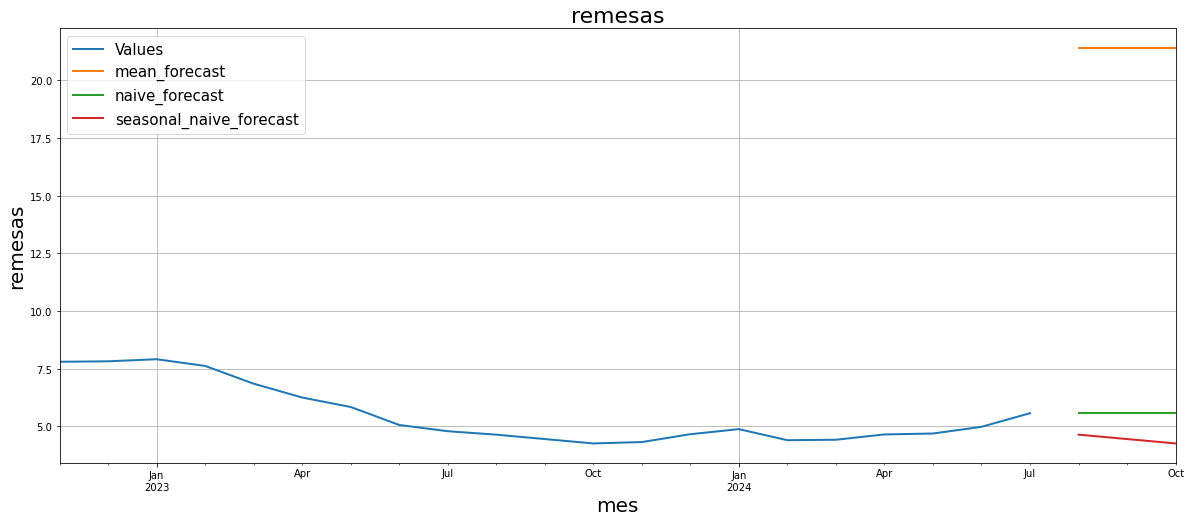

In [56]:

fig, ax = plt.subplots(1, 1, figsize = (20, 8))

# Concatenate the dataframe of predicted values with the dataframe of observed values:
plot_df = pd.concat([inflation_df, Y_pred_df])
plot_df.columns = ['Values', 'mean_forecast', 'naive_forecast', 'seasonal_naive_forecast']
plot_df[-24:].plot(ax=ax, linewidth=2)

# Specify graph features:
ax.set_title('remesas', fontsize=22)
ax.set_ylabel('remesas', fontsize=20)
ax.set_xlabel('mes', fontsize=20)
ax.legend(prop={'size': 15})
ax.grid()

# Comentarios
### Aqui podemos apreciar que la predicción del seasonal toma en cuenta que la tendencia va a la baja debido a los comportamientos en las mismas fechas de años anteriores.

# Drift method


In [59]:

# RandomWalkWithDrift's usage example:
from statsforecast.models import RandomWalkWithDrift

# Define the model, fit and predict:
model = RandomWalkWithDrift()
model = model.fit(y=inflation_df.values.reshape(-1,))
y_hat_dict = model.predict(h=3)

y_hat_dict

{'mean': array([5.5705657, 5.5711317, 5.571697 ], dtype=float32)}

In [60]:

# Create a column with the values predicted:
Y_pred_df["drift_forecast"] = y_hat_dict["mean"]

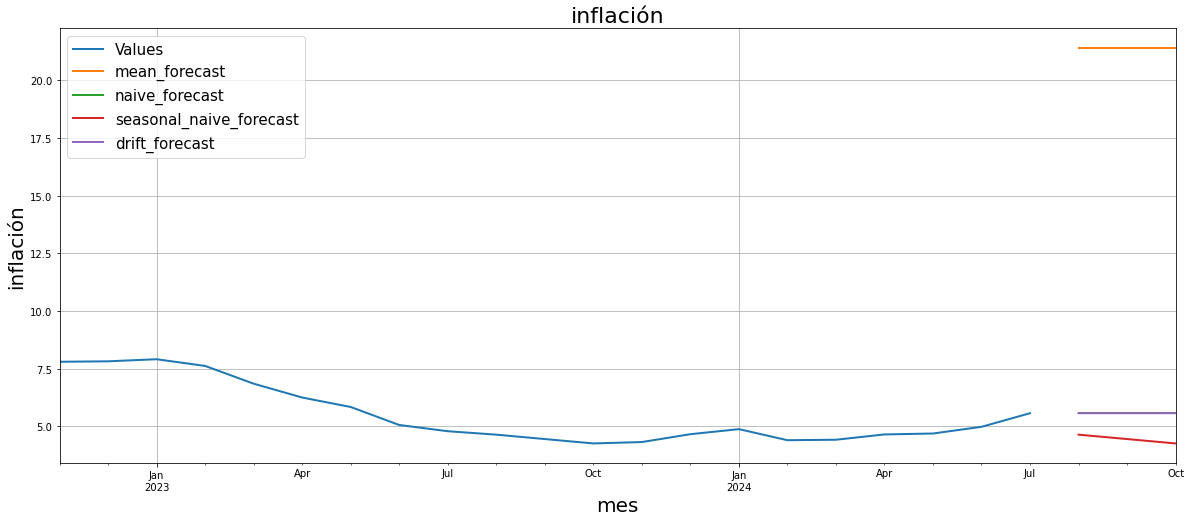

In [63]:

fig, ax = plt.subplots(1, 1, figsize = (20, 8))

# Concatenate the dataframe of predicted values with the dataframe of observed values:
plot_df = pd.concat([inflation_df, Y_pred_df])
plot_df.columns = ['Values', 'mean_forecast', 'naive_forecast', 'seasonal_naive_forecast', 'drift_forecast']
plot_df[-24:].plot(ax=ax, linewidth=2)

# Specify graph features:
ax.set_title('inflación', fontsize=22)
ax.set_ylabel('inflación', fontsize=20)
ax.set_xlabel('mes', fontsize=20)
ax.legend(prop={'size': 15})
ax.grid()

# Comentarios

#### En la gráfica superior podemos apreciar los diferentes tipos de predicci'on a nuestra base de datos (Values). Apreciamos que el mean_forecast es un pésimo modelo para predecir el comportamiento a futuro de la inflación. Nuestra mejor proyección sería el drift_forecast / naive_forcast debido a la falta de cambios significativos en las tendencias.  

# Valores Residuales

In [86]:
def augment(model_name, time_var, obs_values):

    type_model_list = []
    for n in range(len(obs_values)):
        type_model_list.append(model_name)
        n += 1
    fitted_values = model.predict_in_sample()
    residuals = obs_values - fitted_values["fitted"]

    augment_df = pd.DataFrame({'model':type_model_list,
                        'time_var':time_var,
                        'obs_values':obs_values,
                        'fitted_values':fitted_values["fitted"],
                        'residuals':residuals})

    return(augment_df)

In [87]:

# Define the model, fit and predict:
model = SeasonalNaive(season_length=12)
model = model.fit(y=inflation_df.values.reshape(-1,))
mean = model.predict(h=12)

In [88]:
# augment(model_name, time_var, obs_values)
augment_df = augment("Mean",inflation_df.index,inflation_df.values.reshape(-1,))
augment_df

,model,time_var,obs_values,fitted_values,residuals
0,Mean,1970-01-01,5.20,NaN,NaN
1,Mean,1970-02-01,4.81,NaN,NaN
2,Mean,1970-03-01,5.01,NaN,NaN
3,Mean,1970-04-01,4.87,NaN,NaN
4,Mean,1970-05-01,5.09,NaN,NaN
...,...,...,...,...,...
650,Mean,2024-03-01,4.42,6.85,-2.43
651,Mean,2024-04-01,4.65,6.25,-1.60
652,Mean,2024-05-01,4.69,5.84,-1.15
653,Mean,2024-06-01,4.98,5.06,-0.08


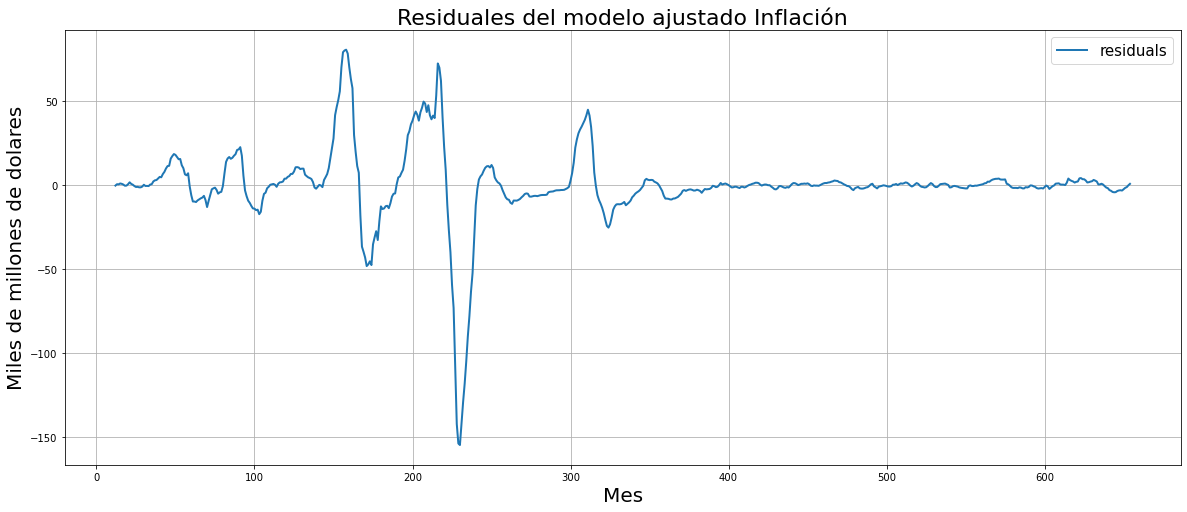

In [90]:

fig, ax = plt.subplots(1, 1, figsize = (20, 8))
augment_df['residuals'].plot(ax=ax, linewidth=2)

# Specify graph features:
ax.set_title('Residuales del modelo ajustado Inflación', fontsize=22)
ax.set_ylabel('Miles de millones de dolares', fontsize=20)
ax.set_xlabel('Mes', fontsize=20)
ax.legend(prop={'size': 15})
ax.grid()

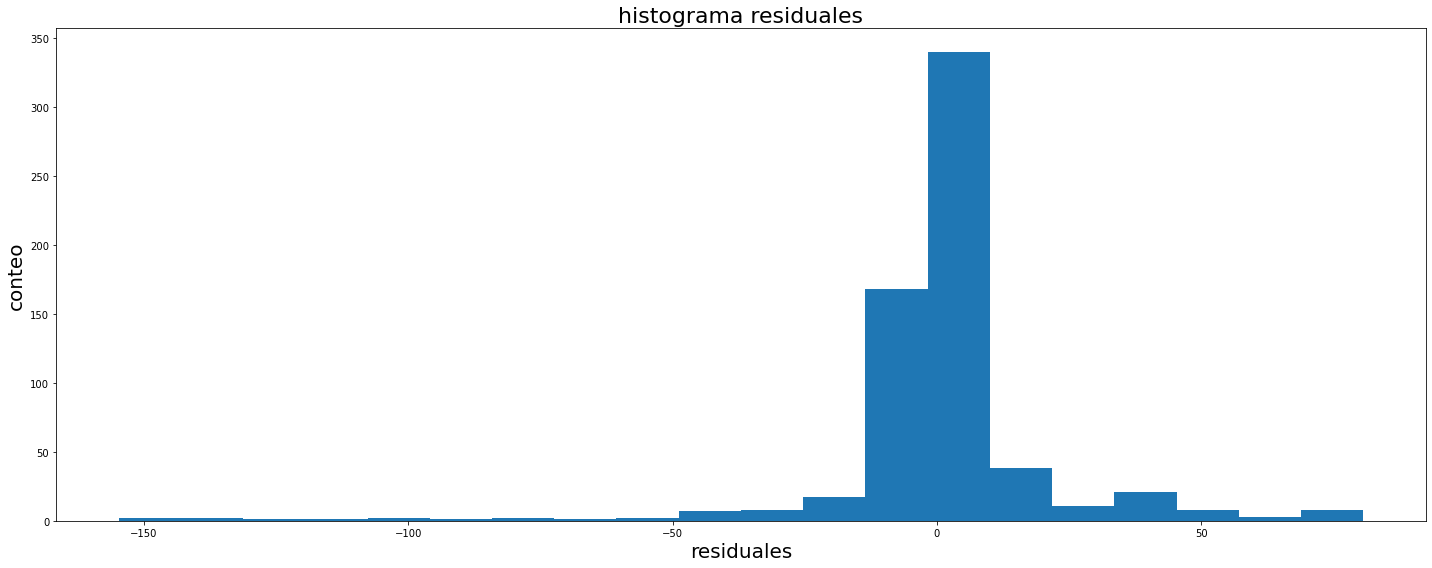

In [91]:
# Creating histogram
fig, axs = plt.subplots(1, 1,
                        figsize =(20, 8),
                        tight_layout = True)

axs.hist(augment_df["residuals"], bins = 20)

# Specify graph features:
axs.set_title('histograma residuales', fontsize=22)
axs.set_ylabel('conteo', fontsize=20)
axs.set_xlabel('residuales', fontsize=20)

# Show plot
plt.show()

Text(0, 0.5, 'ACF')

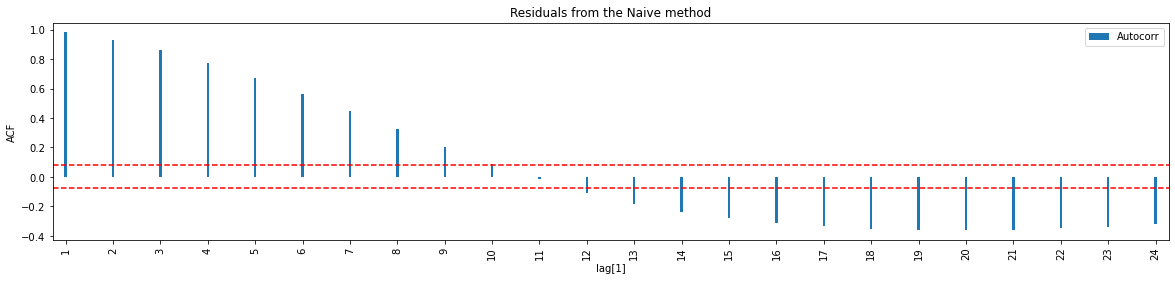

In [92]:

import math

ticker_data = augment_df["residuals"]
ticker_data_acf = [ticker_data.autocorr(i) for i in range(1,25)]

test_df = pd.DataFrame([ticker_data_acf]).T
test_df.columns = ['Autocorr']
test_df.index += 1
test_df.plot(kind='bar', width = 0.05, figsize = (20, 4))

# Statisfical significance.
n = len(augment_df['residuals'])
plt.axhline(y = 2/math.sqrt(n), color = 'r', linestyle = 'dashed')
plt.axhline(y = -2/math.sqrt(n), color = 'r', linestyle = 'dashed')

# Adding plot title.
plt.title("Residuals from the Naive method")

# Providing x-axis name.
plt.xlabel("lag[1]")

# Providing y-axis name.
plt.ylabel("ACF")
     

In [93]:

import statsmodels
     

ljung_box = statsmodels.stats.diagnostic.acorr_ljungbox(test_df, lags=12, model_df=0)
ljung_box.tail(1)

,lb_stat,lb_pvalue
12,78.258926,8.856362e-12


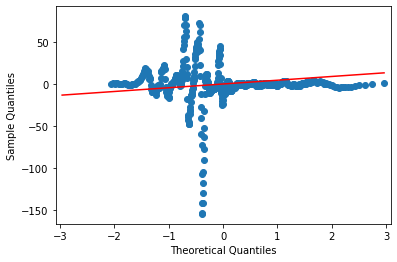

In [94]:

fig = statsmodels.api.qqplot(augment_df[['residuals']].values, line='q')
plt.show()

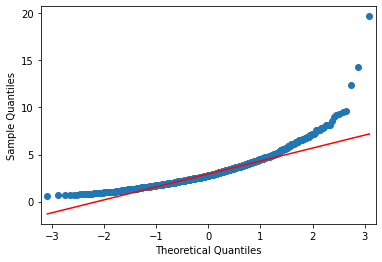

In [95]:

from scipy.stats import lognorm
np.random.seed(1)

#generate dataset that contains 1000 log-normal distributed values
lognorm_dataset = lognorm.rvs(s=.5, scale=math.exp(1), size=1000)

#create Q-Q plot with 45-degree line added to plot
fig = statsmodels.api.qqplot(lognorm_dataset, line='q')

plt.show()
     